<a href="https://colab.research.google.com/github/piyush8227/Rice-Grain-Quality-Assessment-using-CNN/blob/main/Rice_grain_quality_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unziping Image Data into environment**

In [3]:
!unzip '/content/drive/MyDrive/Rice Grain Quality Assessment/Rice Grain Image dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

In [10]:
import os
import shutil
import random

# Set the file location where the rice grain images are stored.
rice_grain_image_data_path = '/content/Rice_Image_Dataset'

# Create a list of the rice class names.
rice_classes = ['Basmati', 'Arborio', 'Ipsala', 'Jasmine', 'Karacadag']

# Create a dictionary to store the train, test and validation image paths.
image_paths = {
    'train': [],
    'test': [],
    'validation': []
}

# Iterate over the rice classes and split the image data into train, test and validation sets.
for rice_class in rice_classes:
    # Get the path to the rice class folder.
    rice_class_path = os.path.join(rice_grain_image_data_path, rice_class)

    # Get a list of all the image files in the rice class folder.
    rice_class_image_files = os.listdir(rice_class_path)

    # Split the image files into train, test and validation sets.
    random.shuffle(rice_class_image_files)

    # Train set: 70%
    train_image_files = rice_class_image_files[:int(0.7 * len(rice_class_image_files))]

    # Test set: 15%
    test_image_files = rice_class_image_files[int(0.7 * len(rice_class_image_files)):int(0.85 * len(rice_class_image_files))]

    # Validation set: 15%
    validation_image_files = rice_class_image_files[int(0.85 * len(rice_class_image_files)):]

    # Add the image paths to the corresponding train, test and validation sets.
    for image_file in train_image_files:
        image_path = os.path.join(rice_class_path, image_file)
        image_paths['train'].append(image_path)

    for image_file in test_image_files:
        image_path = os.path.join(rice_class_path, image_file)
        image_paths['test'].append(image_path)

    for image_file in validation_image_files:
        image_path = os.path.join(rice_class_path, image_file)
        image_paths['validation'].append(image_path)

# Create the train, test and validation directories if they do not exist.
train_dir = os.path.join(rice_grain_image_data_path, 'train')
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

test_dir = os.path.join(rice_grain_image_data_path, 'test')
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

validation_dir = os.path.join(rice_grain_image_data_path, 'validation')
if not os.path.exists(validation_dir):
    os.makedirs(validation_dir)

# Move the train, test and validation images to their respective directories.
for image_path in image_paths['train']:
    shutil.move(image_path, train_dir)

for image_path in image_paths['test']:
    shutil.move(image_path, test_dir)

for image_path in image_paths['validation']:
    shutil.move(image_path, validation_dir)

print('Train, test and validation image data split successfully!')

Train, test and validation image data split successfully!


# **Displaying sample image**

In [39]:
import os

def get_image_file_paths(folder_path):
  """Extracts image file paths from a folder of images.

  Args:
    folder_path: The path to the folder containing the images.

  Returns:
    A list of image file paths.
  """

  image_file_paths = []
  for root, directories, files in os.walk(folder_path):
    for file in files:
      if file.endswith('.jpg') or file.endswith('.png'):
        image_file_paths.append(os.path.join(root, file))

  return image_file_paths


In [40]:
image_file_paths = get_image_file_paths("/content/Rice_Image_Dataset/train")

In [43]:
# Checking the shape of rice images
for image_path in image_file_paths:
  img = cv2.imread(image_path)
  shapes = img.shape
  print(shapes)

Streaming output truncated to the last 5000 lines.
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 

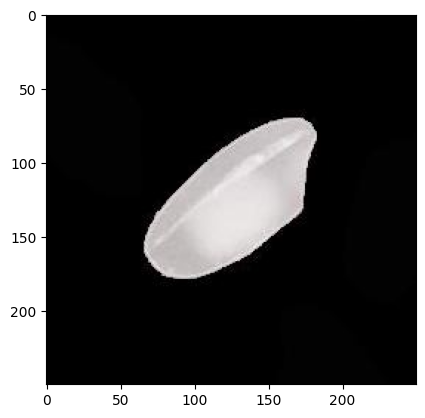

In [29]:
import cv2
import matplotlib.pyplot as plt
path = "/content/Rice_Image_Dataset/test/Arborio (11150).jpg"
img = cv2.imread(path)
plt.imshow(img)
plt.show()

In [30]:
img.shape

(250, 250, 3)

In [ ]:
def image_shape(path):
  shape = cv2.imread(path).shape
  print("Shape of image:", )